# Exercise 2: Movie Recommendations

#### 1. Importing the libraries

In [1]:
!pip install apyori

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### 2. Loading the dataset

In [3]:
users = pd.read_csv("users.csv", sep=";")
ratings = pd.read_csv("ratings.csv", sep=";")
movies = pd.read_csv("movies.csv", sep=";", encoding="latin")

In [4]:
for df in [users, ratings, movies]:
    print(df.head())
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

   userId gender  age  occupation zip-code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7     2460
4       5      M   25          20    55455
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
   userId  movieId  rating  timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
   movieId                               title                        genres  \
0        1                    Toy Story (1995)   Animation|Children's|Comedy   
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy   
2        3             Grumpier Old Men (1995)                Comedy|Romance   
3        4            Waiting 

In [5]:
# Merge the data of movies, ratings and users
data = pd.merge(pd.merge(ratings, users), movies)
data.head()

,userId,movieId,rating,timestamp,gender,age,occupation,zip-code,title,genres,Unnamed: 3
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,NaN
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama,NaN
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama,NaN
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama,NaN
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama,NaN


In [6]:
# Drop Column
data.drop("Unnamed: 3", axis = 1, inplace = True)

In [7]:
# Data Type of Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   userId      1000209 non-null  int64 
 1   movieId     1000209 non-null  int64 
 2   rating      1000209 non-null  int64 
 3   timestamp   1000209 non-null  int64 
 4   gender      1000209 non-null  object
 5   age         1000209 non-null  int64 
 6   occupation  1000209 non-null  int64 
 7   zip-code    1000209 non-null  object
 8   title       1000209 non-null  object
 9   genres      1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [8]:
# Checking missing values
data.isnull().sum().sort_values(ascending = False)

userId        0
movieId       0
rating        0
timestamp     0
gender        0
age           0
occupation    0
zip-code      0
title         0
genres        0
dtype: int64

#### 3. Performing EDA

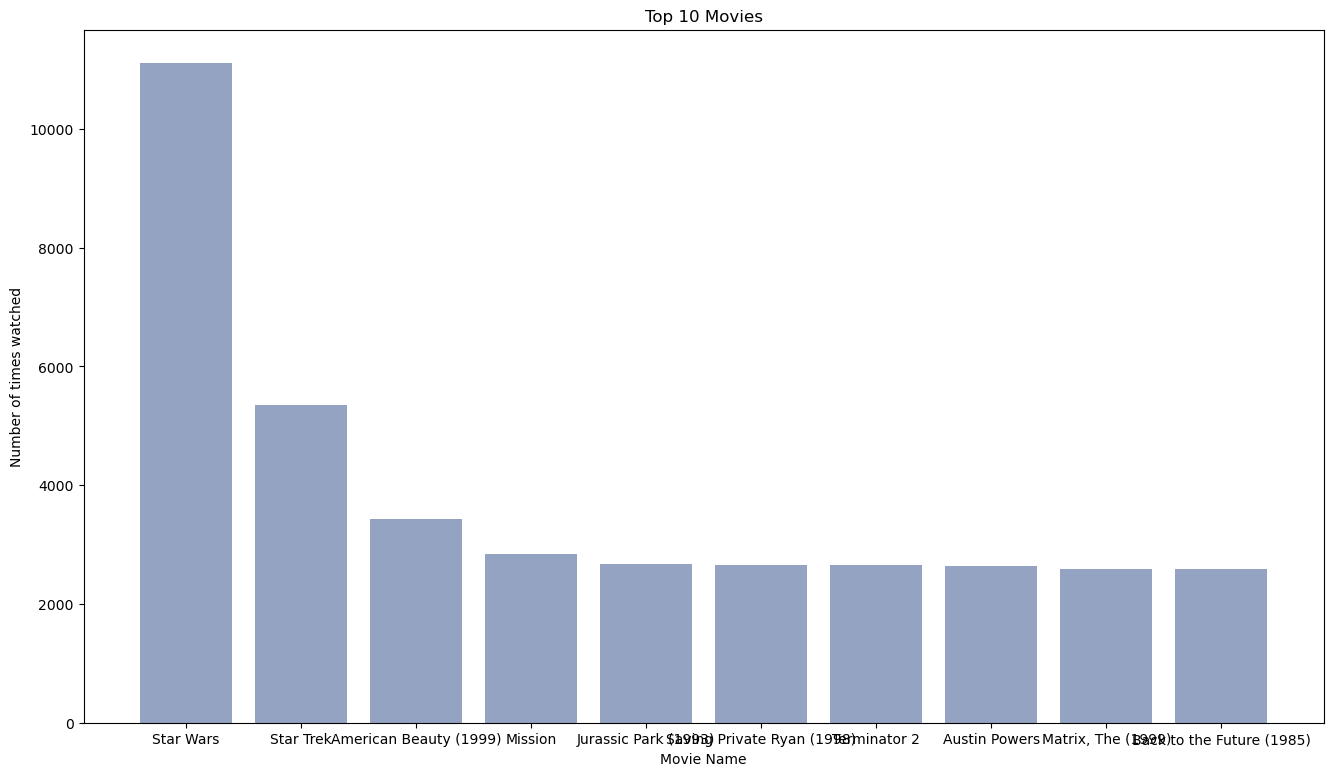

In [9]:
# Top 10 Movies

## Creating distribution of movie 
movie = data.groupby(by = "title").size().reset_index(name = "Frequency").sort_values(by = "Frequency", ascending = False).head(10)

## Declaring variables
bars = movie["title"]
height = movie["Frequency"]
x_pos = np.arange(len(bars))

## Defining Figure Size
plt.figure(figsize=(16, 9))

## Create bars
plt.bar(x_pos, height, color = (0.3, 0.4, 0.6, 0.6))

## Add title and axis names
plt.title("Top 10 Movies")
plt.xlabel("Movie Name")
plt.ylabel("Number of times watched")

## Create names on the x-axis
plt.xticks(x_pos, bars)

## Show  graph
plt.show()

#### 4. Apriori Implementation

In [10]:
# Data Preparation

## Selecting only required variables for modelling
cust_level = data[["userId", "title"]].sort_values(by = "userId", ascending = False)

## Removing white space if any
cust_level["title"] = cust_level["title"].str.strip()
cust_level

,userId,title
265158,6040,Creepshow (1982)
738912,6040,Vertigo (1958)
957513,6040,Breaking the Waves (1996)
799570,6040,Vanya on 42nd Street (1994)
730177,6040,Touch of Evil (1958)
...,...,...
46757,1,Star Wars
45685,1,Run Lola Run (Lola rennt) (1998)
22832,1,Wallace & Gromit
45033,1,Driving Miss Daisy (1989)


In [11]:
# Creating Transcation list 

## Combing all the items in list format
transcations = [a[1]["title"].tolist() for a in list(cust_level.groupby(["userId"]))]

In [12]:
## Training the Apriori model on the dataset
from apyori import apriori
rules = apriori(transactions = transcations, min_support = 0.002, min_confidence = 0.05, min_lift = 3, min_length = 2, max_length = 2)

In [13]:
# Storing results in list format for better visualisation 

## Displaying the first results coming directly from the output of the apriori function
results = list(rules)

In [14]:
results

[RelationRecord(items=frozenset({'$1,000,000 Duck (1971)', '101 Dalmatians (1961)'}), support=0.004801324503311258, ordered_statistics=[OrderedStatistic(items_base=frozenset({'$1,000,000 Duck (1971)'}), items_add=frozenset({'101 Dalmatians (1961)'}), confidence=0.7837837837837838, lift=8.378856732839033), OrderedStatistic(items_base=frozenset({'101 Dalmatians (1961)'}), items_add=frozenset({'$1,000,000 Duck (1971)'}), confidence=0.051327433628318576, lift=8.378856732839033)]),
 RelationRecord(items=frozenset({'$1,000,000 Duck (1971)', '101 Dalmatians (1996)'}), support=0.002980132450331126, ordered_statistics=[OrderedStatistic(items_base=frozenset({'$1,000,000 Duck (1971)'}), items_add=frozenset({'101 Dalmatians (1996)'}), confidence=0.4864864864864865, lift=8.072468072468073)]),
 RelationRecord(items=frozenset({'$1,000,000 Duck (1971)', '12 Angry Men (1957)'}), support=0.002814569536423841, ordered_statistics=[OrderedStatistic(items_base=frozenset({'$1,000,000 Duck (1971)'}), items_ad

In [15]:
## Putting the results well organised into a Pandas DataFrame
def inspect(results):
    lhs         =[tuple(result[2][0][0])[0] for result in results]
    rhs         =[tuple(result[2][0][1])[0] for result in results]
    supports    =[result[1] for result in results]
    confidences =[result[2][0][2] for result in results]
    lifts       =[result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ["Left Hand Side", "Right Hand Side", "Support", "Confidence", "Lift"])

In [16]:
## Displaying the results sorted by descending lifts
## Showing the best possible scenarios
resultsinDataFrame.nlargest(n = 10, columns = "Lift")

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
317906,Carnosaur 2 (1995),Carnosaur 3,0.002483,0.576923,204.977376
894626,Make Mine Music (1946),Melody Time (1948),0.002483,0.750000,188.750000
1100361,"Slumber Party Massacre, The (1982)",Sorority House Massacre (1986),0.002815,0.629630,172.861953
1100353,"Slumber Party Massacre II, The (1987)",Sorority House Massacre (1986),0.002649,0.615385,168.951049
1105218,Sorority House Massacre (1986),Sorority House Massacre II (1990),0.002815,0.772727,166.688312
1100352,"Slumber Party Massacre II, The (1987)","Slumber Party Massacre, The (1982)",0.002649,0.615385,137.663818
643778,Fun and Fancy Free (1947),Melody Time (1948),0.002980,0.514286,129.428571
82706,Amityville 1992,"Amityville Curse, The (1990)",0.002649,0.500000,120.800000
659492,"Ghost of Frankenstein, The (1942)",House of Dracula (1945),0.004139,0.757576,117.327117
1100354,"Slumber Party Massacre II, The (1987)",Sorority House Massacre II (1990),0.002318,0.538462,116.153846
